In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import math
import plotly.plotly as py
import numpy as np
import json

In [20]:
test = pd.read_csv('crime-b.csv')
test = test[test.isnull().sum(1)==0].loc[lambda df: np.logical_and(df['Longitude'] >= -88, df['Latitude'] >= 41.6)]
test.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,bound-0.00100,bound-0.00050,bound-0.00010
0,10404989,HZ141222,02/05/2016 11:35:00 AM,049XX W HUBBARD ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,...,1143372.0,1902559.0,2016,02/12/2016 03:59:22 PM,41.888659,-87.748942,"(41.888658688, -87.748941709)",False,False,False
2,10404991,HZ141303,02/05/2016 12:20:00 PM,003XX S HALSTED ST,0820,THEFT,$500 AND UNDER,OTHER,True,False,...,1171104.0,1898568.0,2016,02/12/2016 03:59:22 PM,41.877144,-87.647217,"(41.877143695, -87.64721684)",True,False,False
3,10404994,HZ141244,02/05/2016 11:09:00 AM,053XX N FOREST GLEN AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),STREET,True,False,...,1141457.0,1935140.0,2016,02/12/2016 03:59:22 PM,41.978100,-87.755168,"(41.978099798, -87.755167509)",False,False,False
5,10404995,HZ141208,02/05/2016 11:30:00 AM,082XX S ELLIS AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,1184330.0,1850557.0,2016,02/12/2016 03:59:22 PM,41.745098,-87.600159,"(41.745097591, -87.600159412)",True,False,False
6,10404996,HZ141360,02/05/2016 01:15:00 PM,016XX N MAYFIELD AVE,501A,OTHER OFFENSE,ANIMAL ABUSE/NEGLECT,RESIDENTIAL YARD (FRONT/BACK),False,False,...,1136840.0,1910389.0,2016,02/12/2016 03:59:22 PM,41.910265,-87.772742,"(41.910264753, -87.772742112)",False,False,False


In [32]:
distance = [0.001, 0.0005, 0.0001]
boundTitle = list(map(lambda x: 'bound-%.5f' % x, distance))
print(boundTitle)

['bound-0.00100', 'bound-0.00050', 'bound-0.00010']


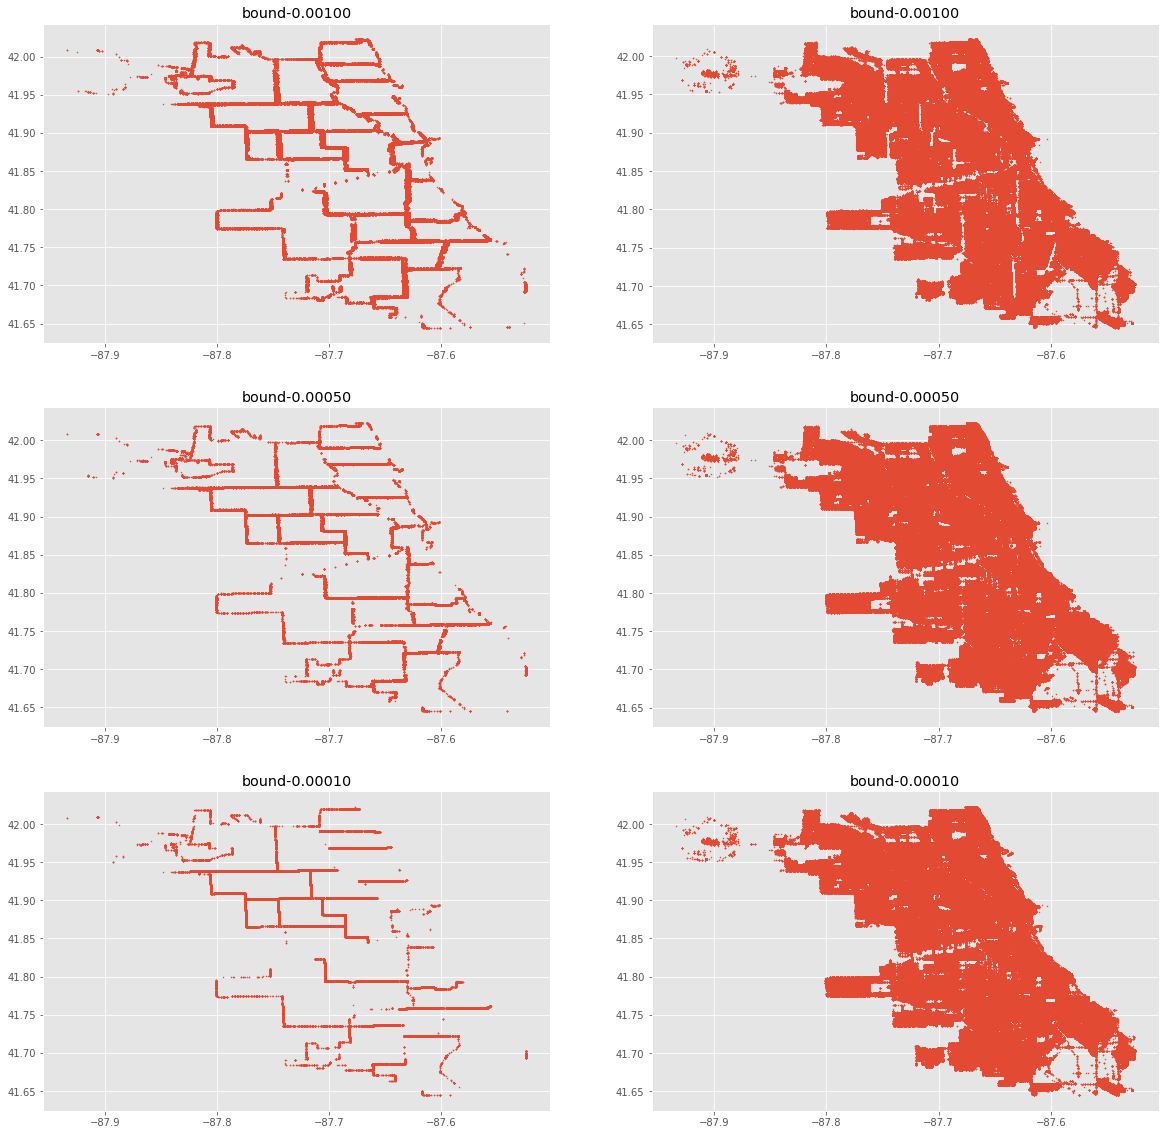

In [10]:
Row = len(distance)
Col = 2

fig, axes = plt.subplots(nrows=Row, ncols=Col, figsize=(20, 20))

for i in range(len(boundTitle)):
    isBorder = test.loc[lambda df: df[boundTitle[i]]]
    x = np.array(isBorder[['Longitude']]).reshape(1, -1)[0]
    y = np.array(isBorder[['Latitude']]).reshape(1, -1)[0]
    axes[i,0].scatter(x,y,1)
    axes[i,0].set_title(boundTitle[i])

    notBorder = test.loc[lambda df: df[boundTitle[i]] == False]
    x = np.array(notBorder[['Longitude']]).reshape(1, -1)[0]
    y = np.array(notBorder[['Latitude']]).reshape(1, -1)[0]
    axes[i,1].scatter(x,y,1)
    axes[i,1].set_title(boundTitle[i])


In [33]:
title = ['all'] + boundTitle

border = [test] + list(map(lambda title: test.loc[lambda df: df[title]], boundTitle))
lt = len(test)
data = []
for i in range(len(border)):
    b = border[i]
    lb = len(b)
    lba = len(b.loc[lambda df: df['Arrest']])
    lbua = lb - lba
    data.append([title[i], lb, lb / lt * 100, lba, lba / lb * 100, lbua, lbua / lb * 100])
    
data = pd.DataFrame(data)
data.columns = ['Area', 'all (#)', 'all (%)', 'arrest (#)', 'arrest (%)', 'unarrest (#)', 'unarrest (%)']

print(data)

            Area  all (#)     all (%)  arrest (#)  arrest (%)  unarrest (#)  \
0            all  5621189  100.000000     1584682   28.191224       4036507   
1  bound-0.00100   655863   11.667692      211011   32.173030        444852   
2  bound-0.00050   335724    5.972473      119672   35.645947        216052   
3  bound-0.00010   210340    3.741913       78243   37.198346        132097   

   unarrest (%)  
0     71.808776  
1     67.826970  
2     64.354053  
3     62.801654  


In [42]:
plt.subplots_adjust(wspace = 30)
Row = 5
Col = 7

allcrime = [[], [], [], []]
label = []
for a in range(len(test['Primary Type'].value_counts().index)):
    crimeClass = test['Primary Type'].value_counts().index[a]
    label.append(crimeClass)
    
    for i in range(len(border)):
        d = border[i].loc[lambda df: df['Primary Type'] == crimeClass]
        dua = d.loc[lambda df: df['Arrest']  == False]
        if len(d) == 0:
            allcrime[i].append(0)
        else: 
            allcrime[i].append(len(dua) / len(d) * 100)

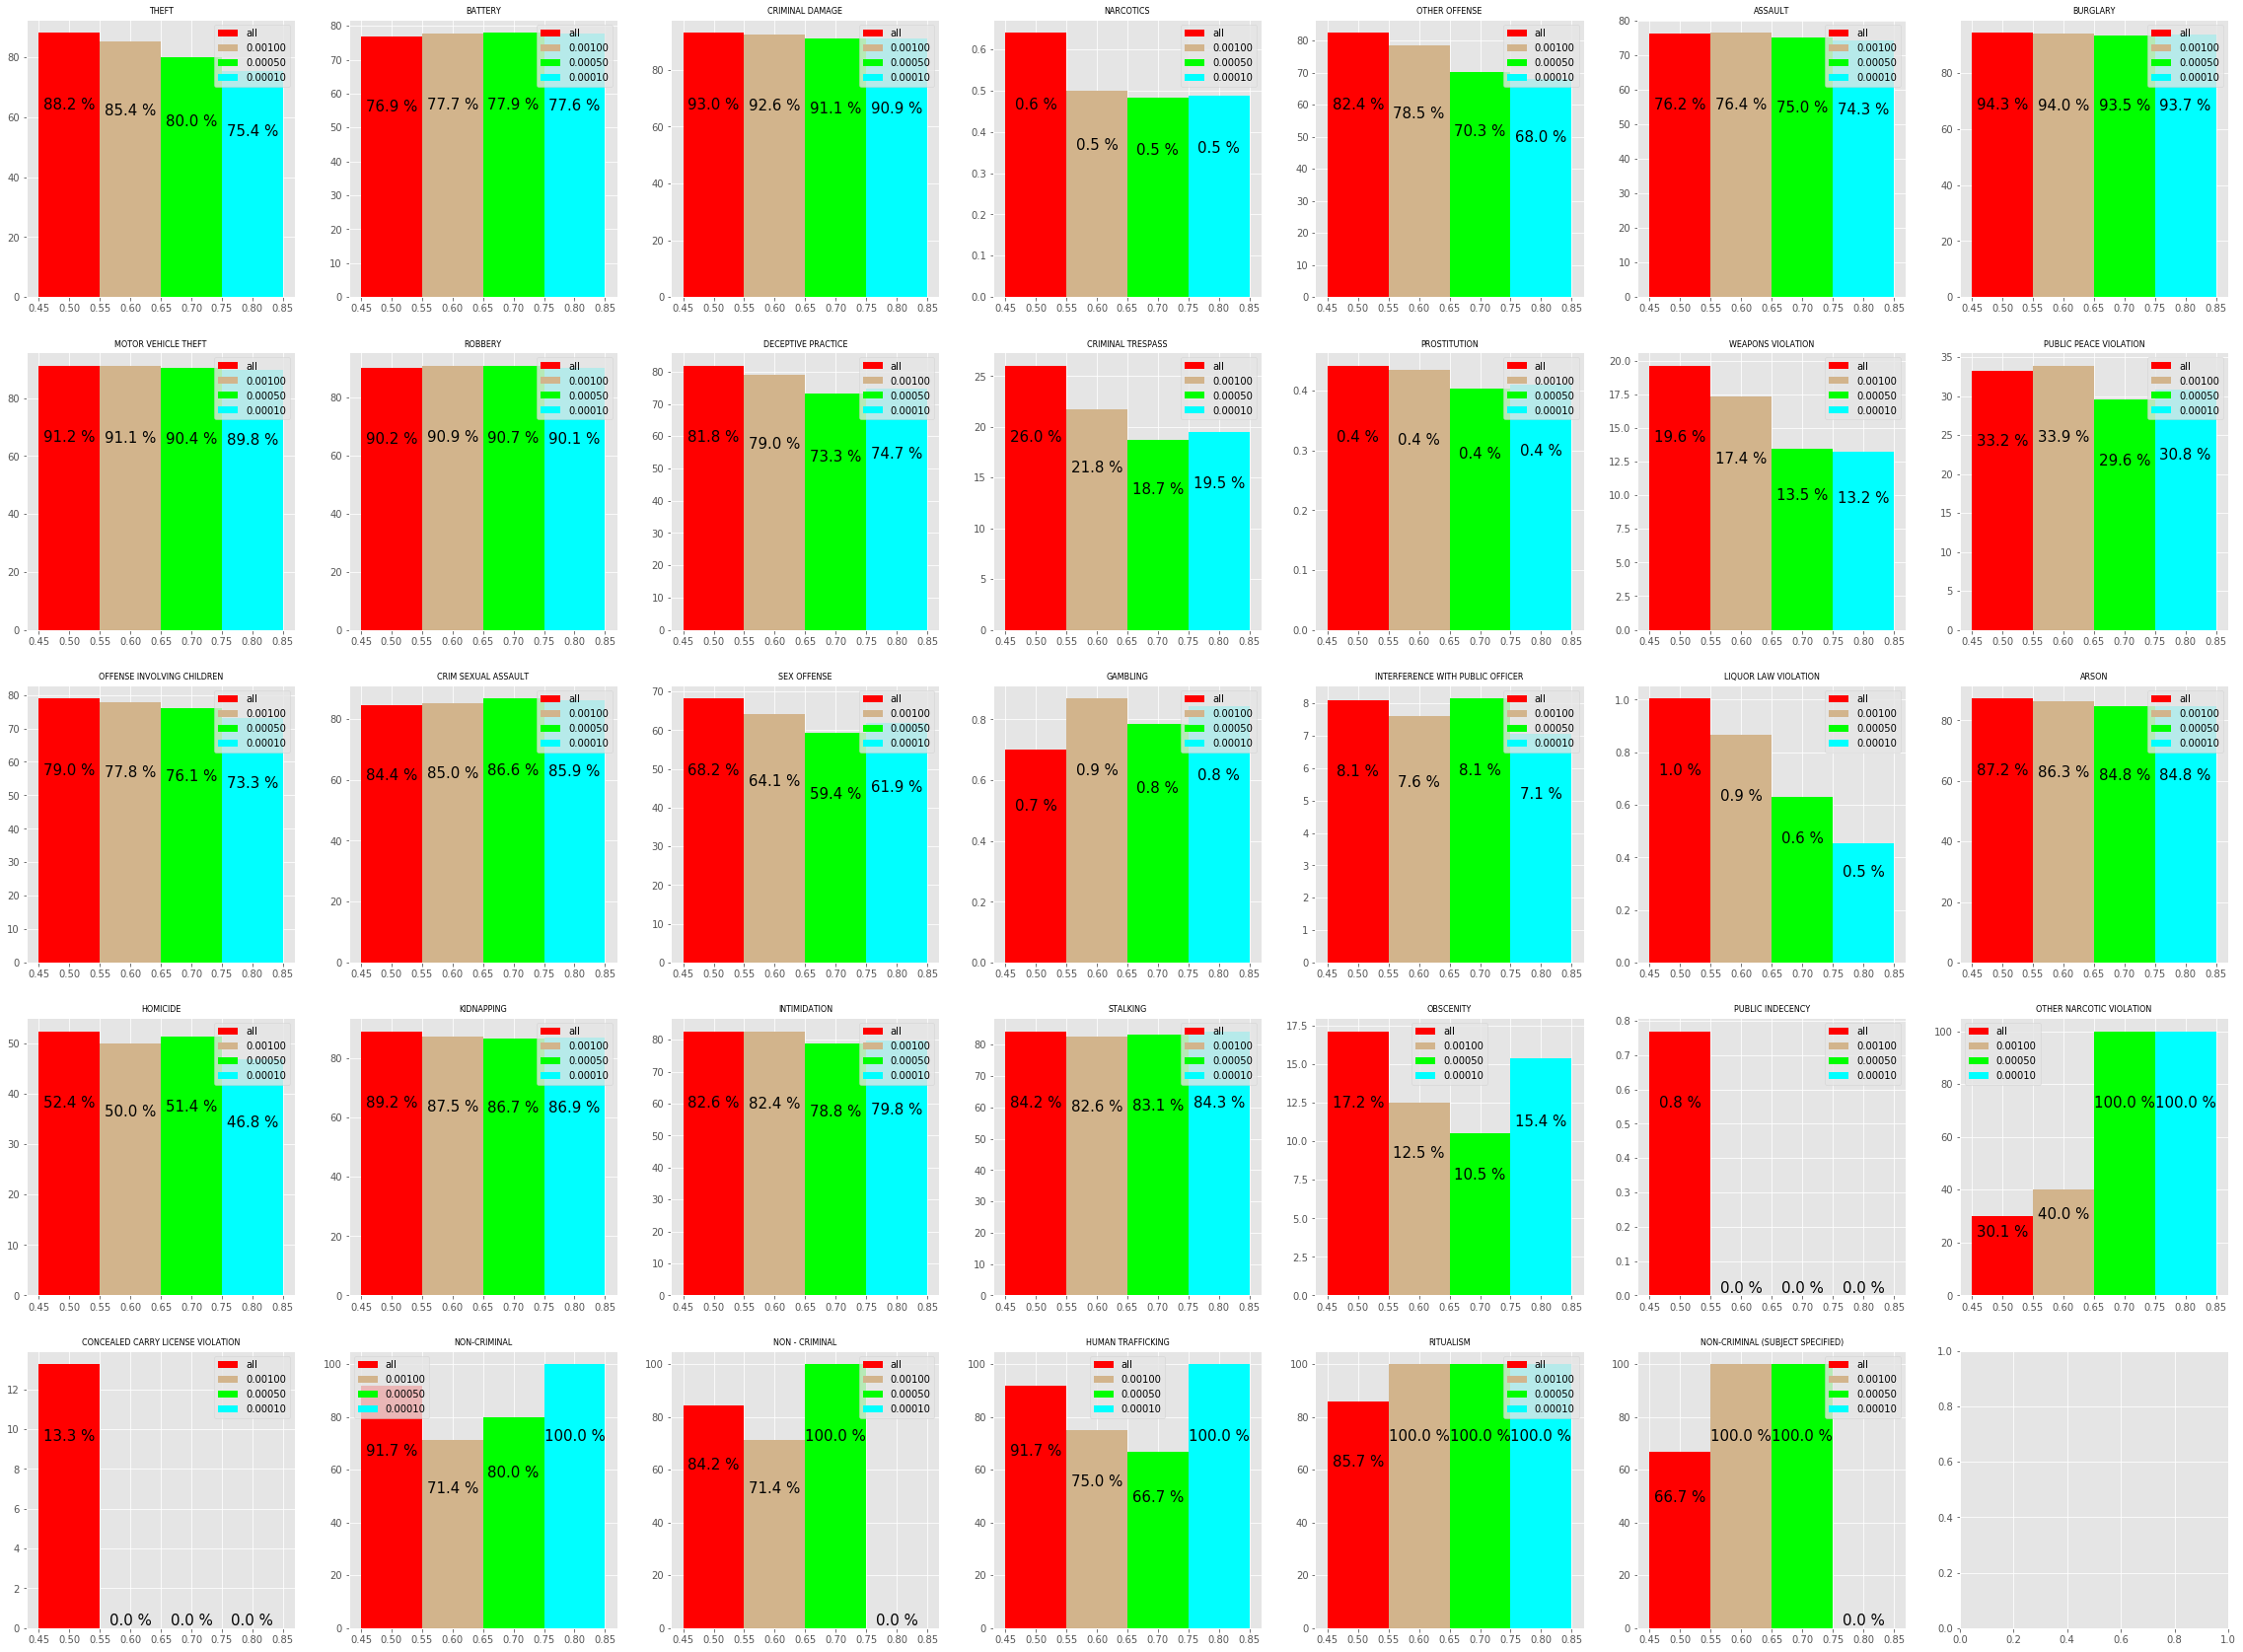

In [78]:
width = 0.1
color = ['red', 'tan', 'lime', 'cyan']
fig, axes = plt.subplots(nrows=Row, ncols=Col, figsize=(40, 30))

trimTitle = [t if 'bound' not in t else t.split('-')[1] for t in title]

def autolabel(rects, subplot):
    for rect in rects:
        height = rect.get_height()
        subplot.text(rect.get_x() + rect.get_width() / 2., 0.7 * height,
                '%.1f %%' % float(height),
                ha='center', va='bottom', fontsize = 14)

for i in range(len(label)):
    rect = []
    for j in range(len(trimTitle)):
        rect.append(axes[int(i/Col),i%Col].bar(0.5 + width * j, [allcrime[j][i]], width, color=color[j]))
    
    axes[int(i/Col),i%Col].legend([i[0] for i in rect], trimTitle)
    axes[int(i/Col),i%Col].set_title(label[i], fontsize=8)
    
    for r in rect:
        autolabel(r, axes[int(i/Col),i%Col])

In [8]:
# theft(0, 0) narcotics(0, 3) other offense(0, 4)
# criminal trespass(1, 3) weapons violation(1, 5)
# sex offense (2, 2)
# obscenity (3, 4)
crimeTag = ['THEFT', 'NARCOTICS', 'OTHER OFFENSE', 'CRIMINAL TRESPASS',
            'WEAPONS VIOLATION', 'SEX OFFENSE', 'OBSCENITY']

In [81]:
data = []
# ['crime type', 'border type', 'total', 'unarrest', 'percentage %']
for crimeClass in crimeTag:
    for i in range(len(border)):
        b = border[i].loc[lambda df: df['Primary Type'] == crimeClass]
        lb = len(b)
        lbua = len(b.loc[lambda df: df['Arrest'] == False])
        data.append([crimeClass, title[i], lb, lbua, lbua / lb * 100])


data = pd.DataFrame(data)
data.columns = ['crime', 'type', 'all (#)', 'unarrest (#)', 'unarrest (%)']
print(data)

                crime           type  all (#)  unarrest (#)  unarrest (%)
0               THEFT            all  1171944       1033374     88.176056
1               THEFT  bound-0.00100   138798        118470     85.354256
2               THEFT  bound-0.00050    79545         63601     79.956000
3               THEFT  bound-0.00010    53340         40196     75.358080
4           NARCOTICS            all   613097          3920      0.639377
5           NARCOTICS  bound-0.00100    90610           453      0.499945
6           NARCOTICS  bound-0.00050    48549           234      0.481987
7           NARCOTICS  bound-0.00010    30159           147      0.487417
8       OTHER OFFENSE            all   347452        286240     82.382602
9       OTHER OFFENSE  bound-0.00100    37020         29063     78.506213
10      OTHER OFFENSE  bound-0.00050    16289         11448     70.280557
11      OTHER OFFENSE  bound-0.00010     9840          6689     67.977642
12  CRIMINAL TRESPASS            all  

In [16]:
with open('boundary-district.geojson') as file:
    feature = json.load(file)['features']

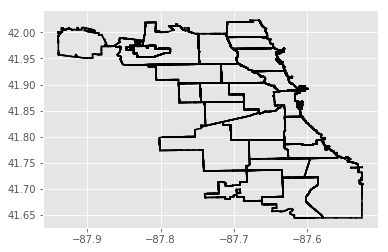

In [5]:
for f in feature:
    for dd in f['geometry']['coordinates'][0]:
        for i in range(len(dd) - 1):
            plt.plot([dd[i][0], dd[i+1][0]], [dd[i][1], dd[i+1][1]], 'k-')
plt.show()

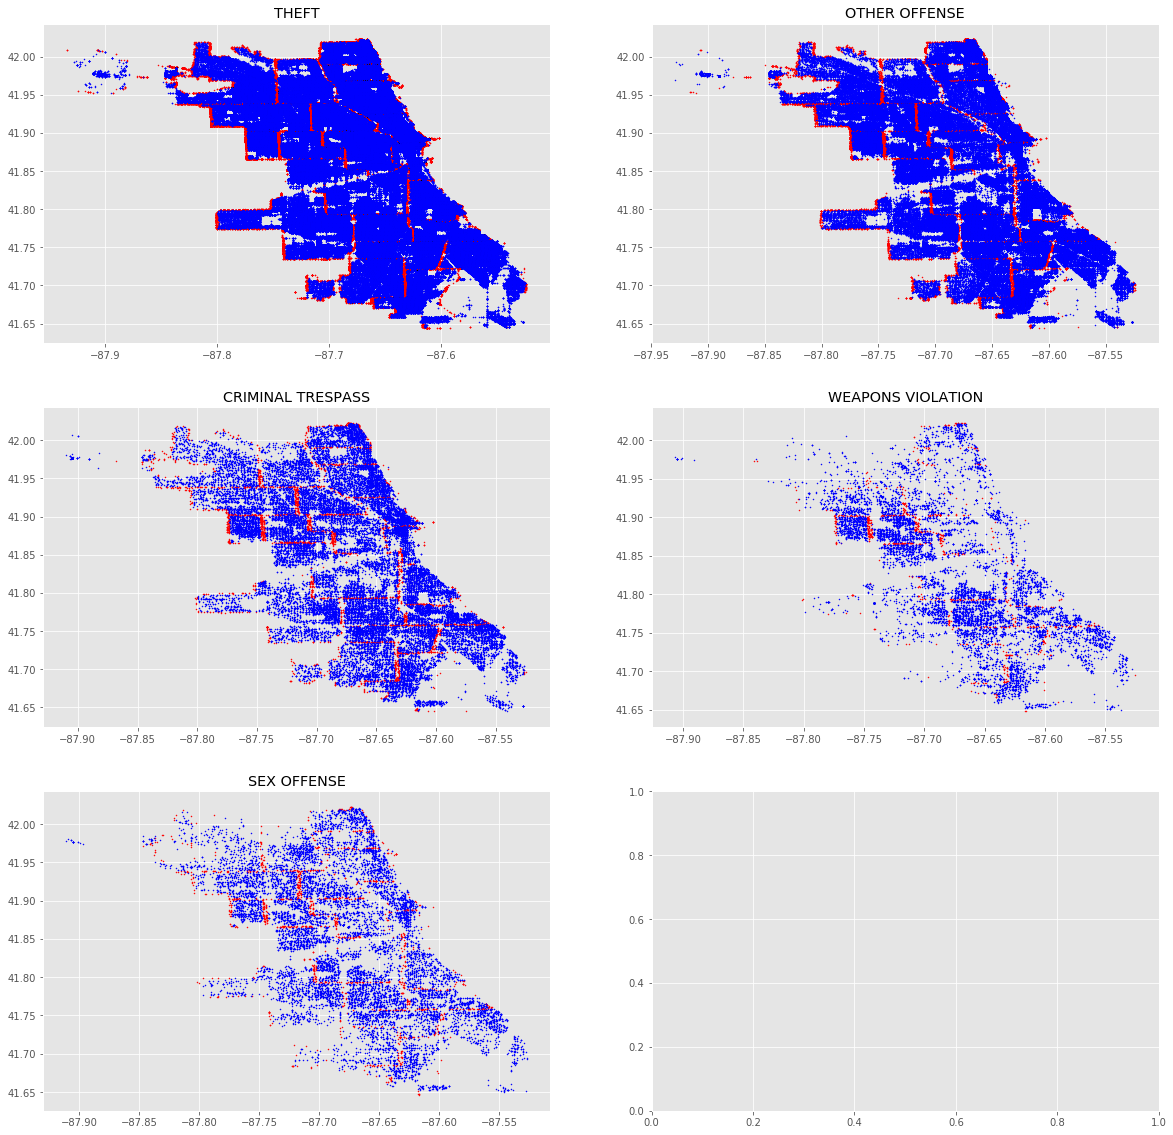

In [38]:
Row = 3
Col = 2
fig, axes = plt.subplots(nrows=Row, ncols=Col, figsize=(20, 20))
cc = [c for c in crimeTag if c not in ['NARCOTICS', 'OBSCENITY']]
for c in range(len(cc)):
    crimeClass = cc[c]
    '''
    for f in feature:
        for dd in f['geometry']['coordinates'][0]:
            for i in range(len(dd) - 1):
                axes[int(c/Col),c%Col].plot([dd[i][0], dd[i+1][0]], [dd[i][1], dd[i+1][1]], 'k-')
        break;
    '''
    
    isBorder = test.loc[
        lambda df: np.logical_and.reduce((
            df['bound-0.00100'], 
            df['Arrest'] == False, 
            df['Primary Type'] == crimeClass
        ))]
    x = np.array(isBorder[['Longitude']]).reshape(1, -1)[0]
    y = np.array(isBorder[['Latitude']]).reshape(1, -1)[0]
    axes[int(c/Col),c%Col].scatter(x,y,1,color='red')
    
    
    notBorder = test.loc[
        lambda df: np.logical_and.reduce((
            df['bound-0.00100'] == False, 
            df['Arrest'] == False, 
            df['Primary Type'] == crimeClass
        ))]
    x = np.array(notBorder[['Longitude']]).reshape(1, -1)[0]
    y = np.array(notBorder[['Latitude']]).reshape(1, -1)[0]
    axes[int(c/Col),c%Col].scatter(x,y,1,color='blue')
    axes[int(c/Col),c%Col].set_title(crimeClass)